<a href="https://colab.research.google.com/github/vishwas-yogi/Traditional-Computer-Vision/blob/main/Analysing_contours_for_increasing_gaussian_blur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.io import imread
from scipy.ndimage import filters

Gaussian Blur (on a single channel or multiple channels)

In [3]:
def apply_gaussian_blur(img, sigma, color_channel = None):
  img_g = np.zeros(img.shape)

  if color_channel == 'r':
    img_g[:, :, 0] = filters.gaussian_filter(img[:, :, 0], sigma)
    img_g[:, :, 1] = img[:, :, 1]
    img_g[:, :, 2] = img[:, :, 2]
    img_g = np.uint8(img_g)
  elif color_channel == 'g':
    img_g[:, :, 1] = filters.gaussian_filter(img[:, :, 1], sigma)
    img_g[:, :, 0] = img[:, :, 0]
    img_g[:, :, 2] = img[:, :, 2]
    img_g = np.uint8(img_g)
  elif color_channel == 'b':
    img_g[:, :, 2] = filters.gaussian_filter(img[:, :, 2], sigma)
    img_g[:, :, 0] = img[:, :, 0]
    img_g[:, :, 1] = img[:, :, 1]
    img_g = np.uint8(img_g)
  else:
    for i in range(3):
      img_g[:, :, i] = filters.gaussian_filter(img[:, :, i], sigma)
    img_g = np.uint8(img_g)
    
  return img_g

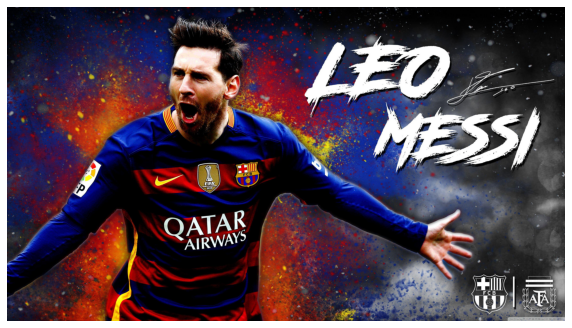

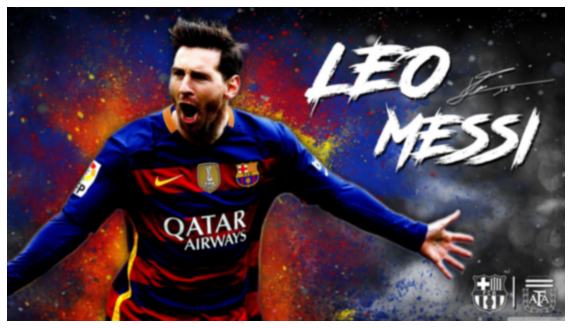

In [4]:
img = imread('messi.jpg')
img_g = apply_gaussian_blur(img, sigma= 5, color_channel= None)
plt.figure(figsize= (10, 20)), plt.subplot(2,1,1), plt.imshow(img), plt.axis('off')
plt.figure(figsize= (10, 20)), plt.subplot(2,1,2), plt.imshow(img_g), plt.axis('off')
plt.show()

Histogram Plotting


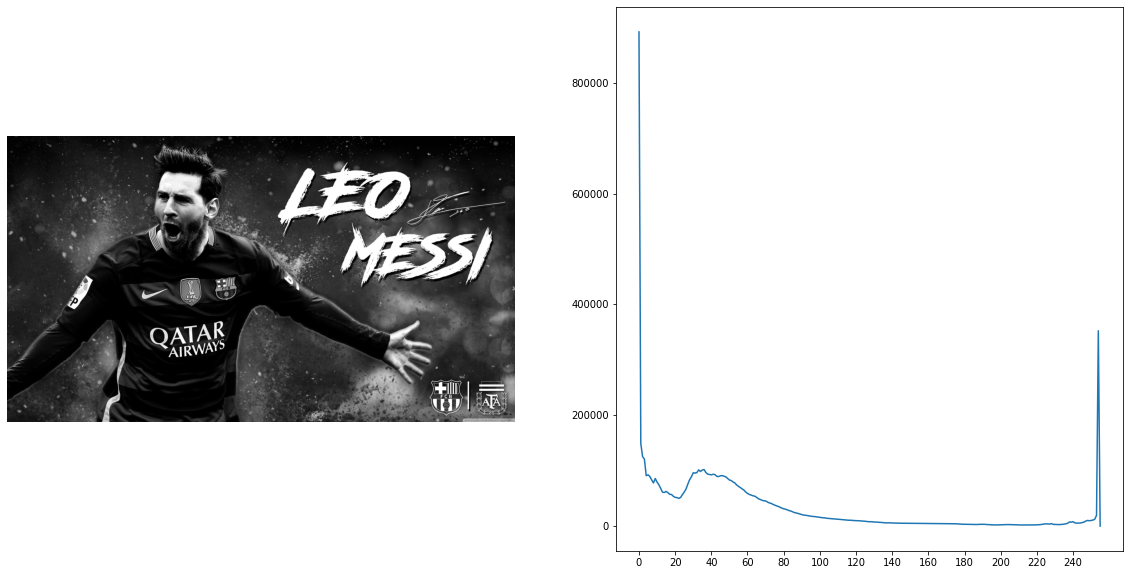

In [5]:
img_gray = cv.imread('messi.jpg', 0)
# from skimage.color import rgb2gray
# img_gray = rgb2gray(img2)
plt.figure(figsize= (20, 10))
plt.subplot(121), plt.imshow(img_gray, cmap= 'gray'), plt.axis('off')
hist = cv.calcHist([img_gray], [0], None, [256], [0, 257])
plt.subplot(122), plt.plot(hist), plt.xticks(np.arange(0, 257, 20))
plt.show()

Binarizing Image for plotting contour using simple thresholding for original image (or sigma= 0)

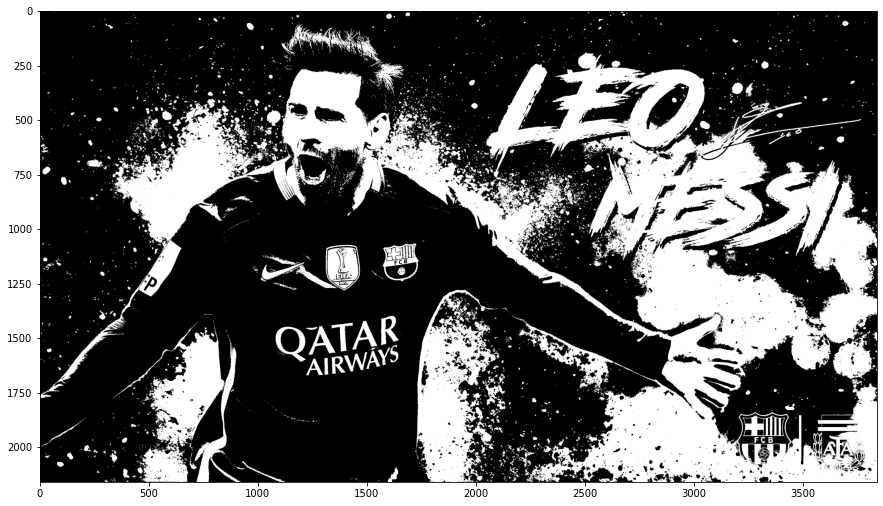

In [6]:
threshold, thresh = cv.threshold(img_gray, 60, 255, cv.THRESH_BINARY)
plt.figure(figsize= (15, 10))
plt.imshow(thresh, cmap= 'gray')
plt.show()

Drawing Contours for original image (or sigma= 0)

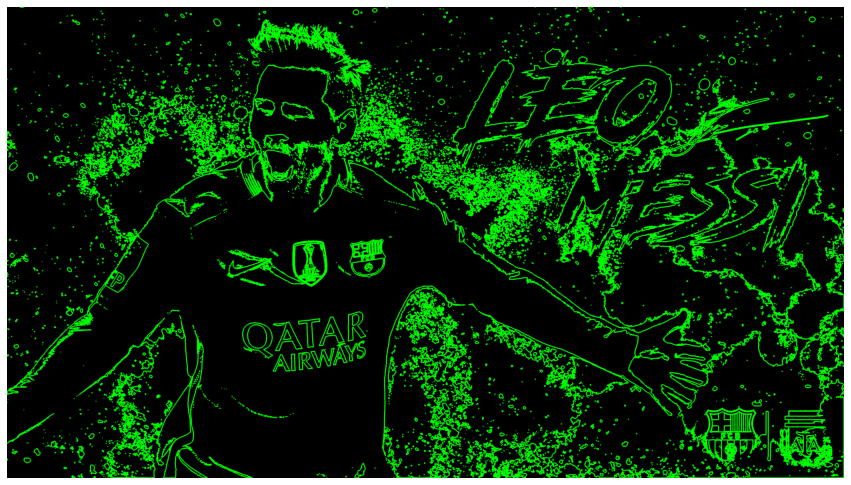

In [7]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
canvas = np.zeros_like(img)
cv.drawContours(canvas, contours, -1, (0,255,0), 3)
plt.figure(figsize= (15, 10))
plt.imshow(canvas), plt.axis('off')
plt.show()

Binarizing Image and Finding Contours

In [8]:
def contour(img_gauss, threshold= 60):

  #Grayscaling image
  img_gray = cv.cvtColor(img_gauss, cv.COLOR_BGR2GRAY)

  #binarizing image simple thresholding
  threshold_val , img_binary = cv.threshold(img_gray, threshold, 255, cv.THRESH_BINARY)

  #finding contours
  contours, hierarchy = cv.findContours(img_binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  return contours, img_gray

Analysing how the contours changes with increasing sigma

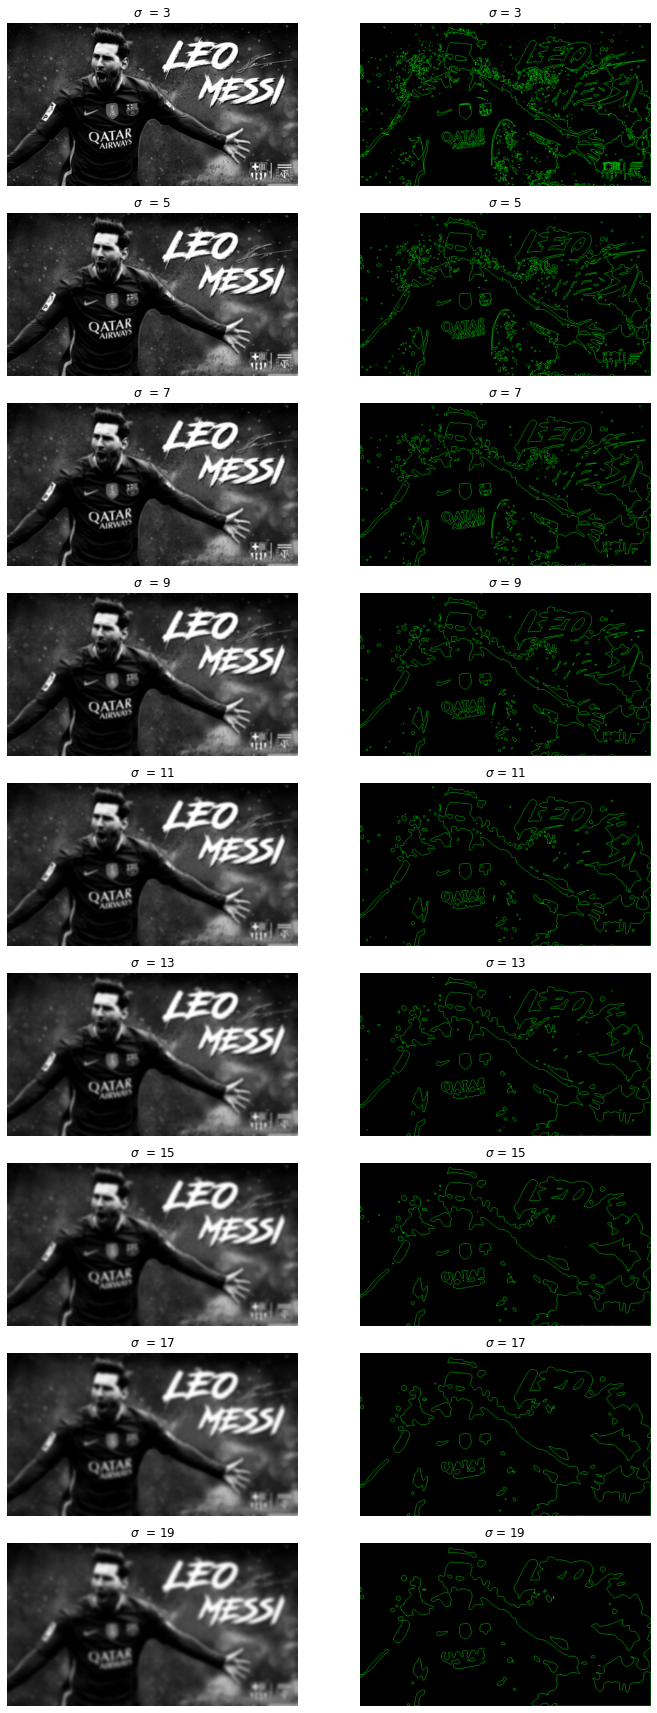

In [27]:
j = 0
fig, ax = plt.subplots(9, 2)
lx,ly = 1000 ,500
margin = 0.3 
spacing =0.1
imsize = 5

figwidth=2*imsize+(2-1)*spacing+2*margin
figheight=9*imsize*ly/lx+(9-1)*spacing+2*margin
fig.set_size_inches(figwidth,figheight)

for sigma in range(3, 20, 2):
  
  img_g = apply_gaussian_blur(img, sigma= sigma, color_channel= None)
  contours, img_gray = contour(img_g)

  canvas = np.zeros_like(img)
  cv.drawContours(canvas, contours, -1, (0,255,0), 3)

  ax[j, 0].imshow(img_gray, cmap= 'gray')
  ax[j, 0].set_title(r'$\sigma$  = {x}'.format(x= sigma)), ax[j, 0].axis('off')
  ax[j, 1].imshow(canvas)
  ax[j, 1].set_title(r'$\sigma$ = {x}'.format(x= sigma)), ax[j, 1].axis('off')
  j= j+1
  
plt.tight_layout()
plt.show()